# Linear regression on vector data 

In [27]:
import numpy as np
# create dummy data for training

#creating the x_values
x_values = [i for i in range(11)]
#making the list to array
x_train = np.array(x_values, dtype=np.float32)
#reshaping the array
x_train = x_train.reshape(-1, 1)


#creating the y_values 
y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [28]:
x_train
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [29]:
#defining the neural network frame work.
import torch
from torch.autograd import Variable
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.layer1 = torch.nn.Linear(inputSize, outputSize)
        self.layer2 = torch.nn.Linear(outputSize,outputSize)
    def forward(self, x):
        layer1_output = self.layer1(x)
        layer2_output = self.layer2(layer1_output)
        return layer2_output
        #return layer1_output

In [30]:
#initilizing the neural network
brain = linearRegression(1,1)
print(brain)

linearRegression(
  (layer1): Linear(in_features=1, out_features=1, bias=True)
  (layer2): Linear(in_features=1, out_features=1, bias=True)
)


In [31]:
#few parameter for the running the model.
learning_rate = 0.01
epoch = 100

In [32]:
# Define Optimizer and Loss Function
optimizer = torch.optim.SGD(brain.parameters(), lr=learning_rate)
loss_func = torch.nn.MSELoss()

In [33]:
x=Variable(torch.from_numpy(x_train),requires_grad=True)
y=Variable(torch.from_numpy(y_train),requires_grad=True)

In [34]:
for i in range(epoch):
    prediction = brain(x)
    optimizer.zero_grad()
    loss = loss_func(prediction,y)
    loss.backward()        
    optimizer.step()
    print('epoch {}, loss {} '.format(i, loss.item()))

epoch 0, loss 165.81227111816406 
epoch 1, loss 60.16057205200195 
epoch 2, loss 40.318546295166016 
epoch 3, loss 130.6571044921875 
epoch 4, loss 38.761531829833984 
epoch 5, loss 40.63197326660156 
epoch 6, loss 127.54048156738281 
epoch 7, loss 40.30809020996094 
epoch 8, loss 35.52171325683594 
epoch 9, loss 114.16018676757812 
epoch 10, loss 18.32438850402832 
epoch 11, loss 32.83439636230469 
epoch 12, loss 105.82597351074219 
epoch 13, loss 10.009312629699707 
epoch 14, loss 22.40444564819336 
epoch 15, loss 77.27056884765625 
epoch 16, loss 1.9088091850280762 
epoch 17, loss 6.835679531097412 
epoch 18, loss 16.557743072509766 
epoch 19, loss 58.56588363647461 
epoch 20, loss 13.157283782958984 
epoch 21, loss 46.89773941040039 
epoch 22, loss 21.58282470703125 
epoch 23, loss 72.57183074951172 
epoch 24, loss 2.489957094192505 
epoch 25, loss 8.578851699829102 
epoch 26, loss 18.420595169067383 
epoch 27, loss 62.4051399230957 
epoch 28, loss 7.5808024406433105 
epoch 29, los

In [35]:
brain(x)

tensor([[2.0071],
        [2.6950],
        [3.3829],
        [4.0708],
        [4.7587],
        [5.4466],
        [6.1345],
        [6.8224],
        [7.5103],
        [8.1982],
        [8.8861]], grad_fn=<AddmmBackward>)

In [36]:
pre=brain(x)
pre=pre.detach().numpy()

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y.detach().numpy(),pre))
print("The error is :- ",rms)

The error is :-  6.932285032739673


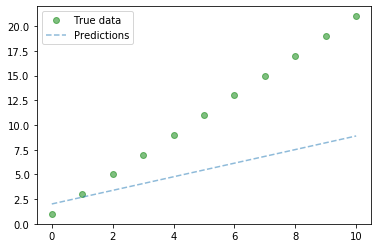

In [38]:
from matplotlib import pyplot as plt
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, pre, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()